# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [48]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [50]:
data = pd.read_csv("train.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [51]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [52]:
data.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

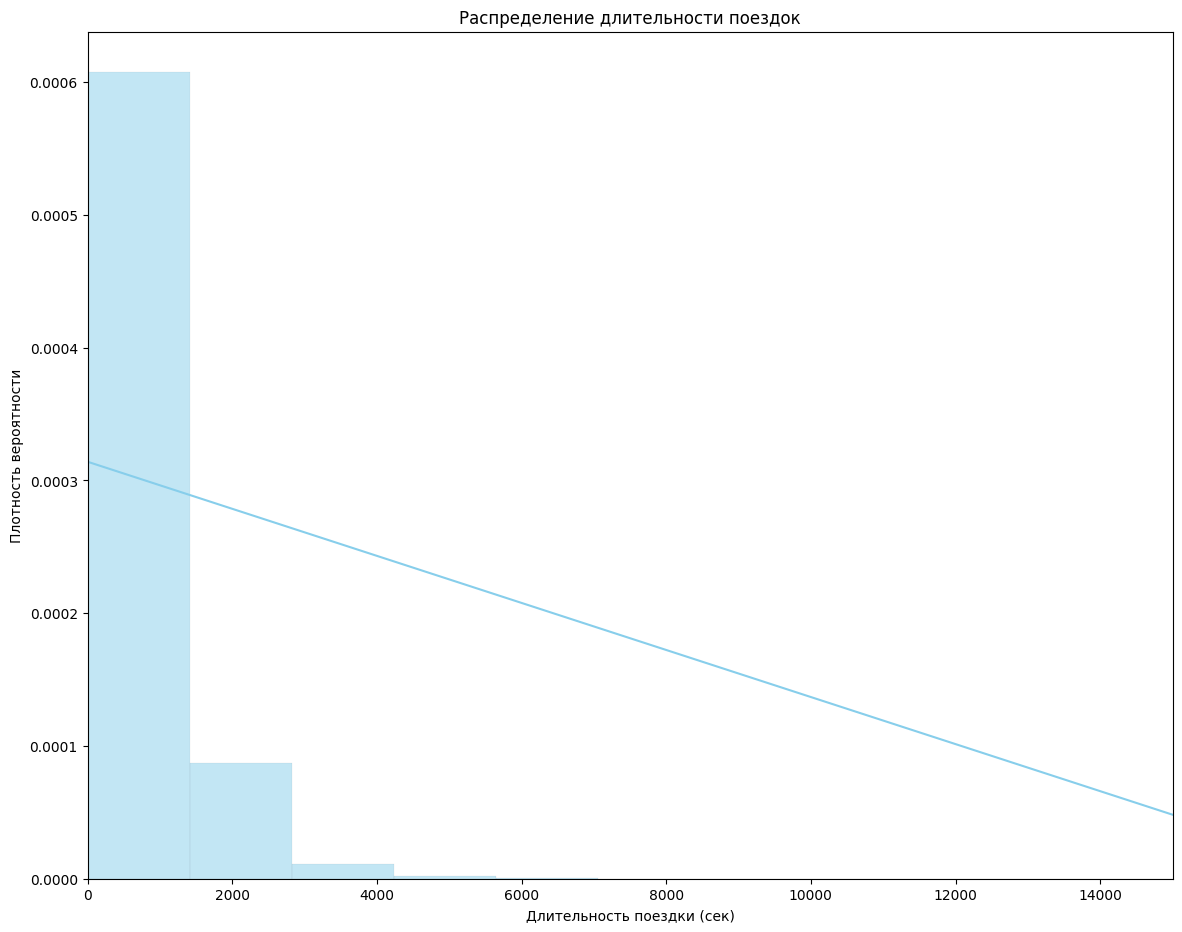

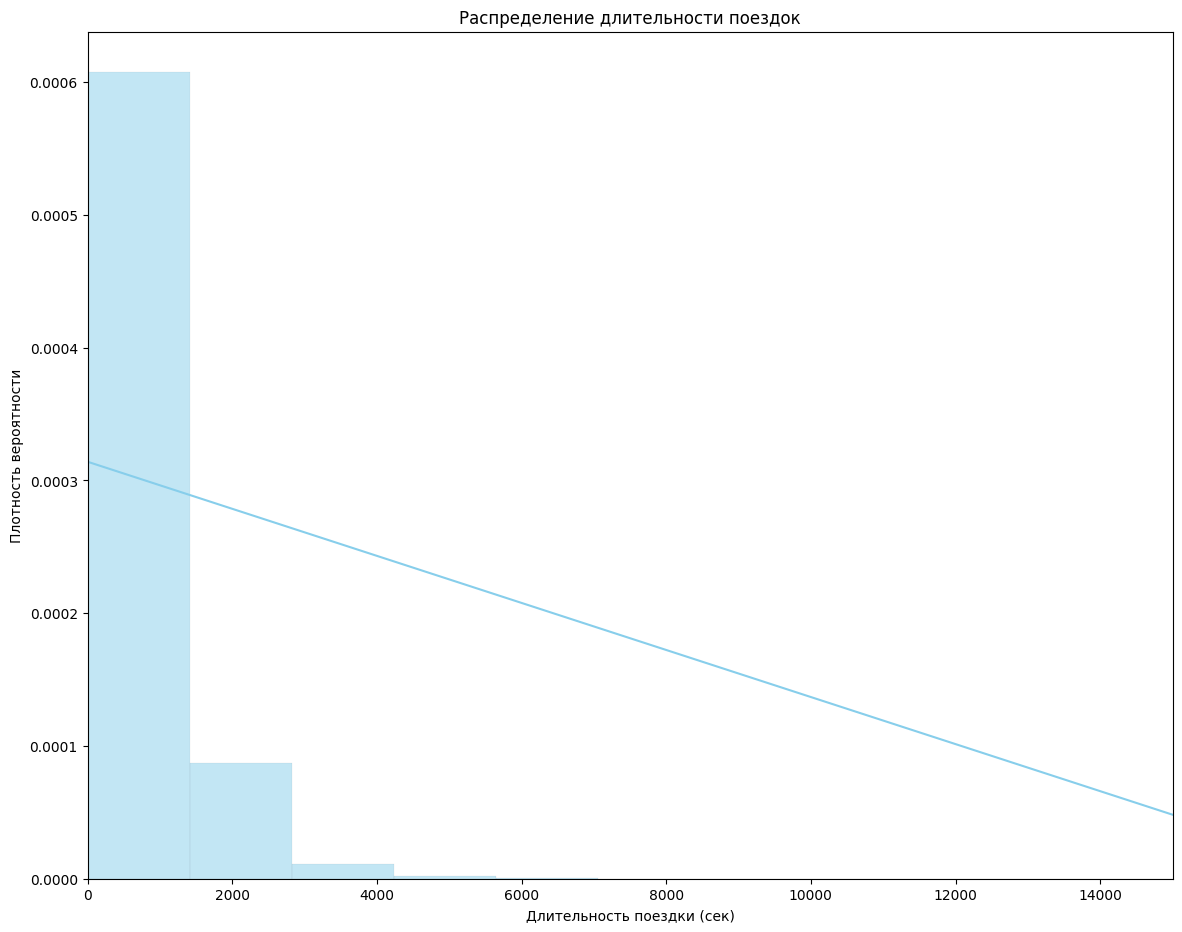

In [53]:
fig = plt.figure(figsize=(14,11))
sns.histplot(data['trip_duration'], bins=2500, color='skyblue', stat='density', kde=True)
plt.xlim(0, 15000)

plt.title('Распределение длительности поездок')
plt.xlabel('Длительность поездки (сек)')
plt.ylabel('Плотность вероятности')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Большинство поездок относительно короткие (до 1500 секунд - 25 минут), но есть и поездки с большей продолжительностью (до 5000 секунд - 83 минут). Также есть выборсы, например, приблизительно 12500 секунд - 208 минут, что может говорить об очень редких и далеких поездках в другие города, например

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

1.   RMSLE менее чувствительна к выбросам: в случае больших выбросов, их вклад в RMSE тоже будет большим (пропорционален корню из квадрата разности), а RMSLE логарифмирует целевую переменную и предсказания, что делает разность меньше и влияние выбросов не таким сильным
2.   RMSLE больше штрафует за недооценку времени поездки, чем за переоценку: $$ {\log{(y_i + 1)} - \log{(a(x_i) + 1)} = \log{\frac{y_i + 1}{a(x_i) + 1}}}$$
В случае недооценки($a(x_i)$ < $y_i$) дробь будет больше 1, значит, чем больше недооценка и дробь, тем больше штраф
В случае переоценки($a(x_i)$ > $y_i$) дробь будет меньше 1, значит, чем больше переоценка, тем ближе дробь к 0, тем меньше штраф
Для пассажира скорее всего будет критичнее, если модель предскажет 10 минут вместо реальных 20 (что впоследствии приведет к опозданию), чем 40 минут вместо 30. Формула отражает различие важности ошибок

На семинаре мы рассматривали несколько моделей линейной регрессии в
`sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

Подставим $\hat{y}_i$ и $\hat{a}(x_i)$:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$

Рассмотрим MSE для нового модели:
$$\text{MSE}(X, \hat{y}_i, \hat{a}(x_i)) = {\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$

$$\text{RMSLE}(X, y, a) = \sqrt{\text{MSE}(X, \hat{y}_i, \hat{a}(x_i))} $$

Полученные метрики связаны квадратным корнем - монотонно возрастающей функцией, поэтому минимизация MSE для логарифмированного таргета $\hat{y}_i$ эквивалентна минимизации RMSLE для исходного таргета ${y}_i$


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

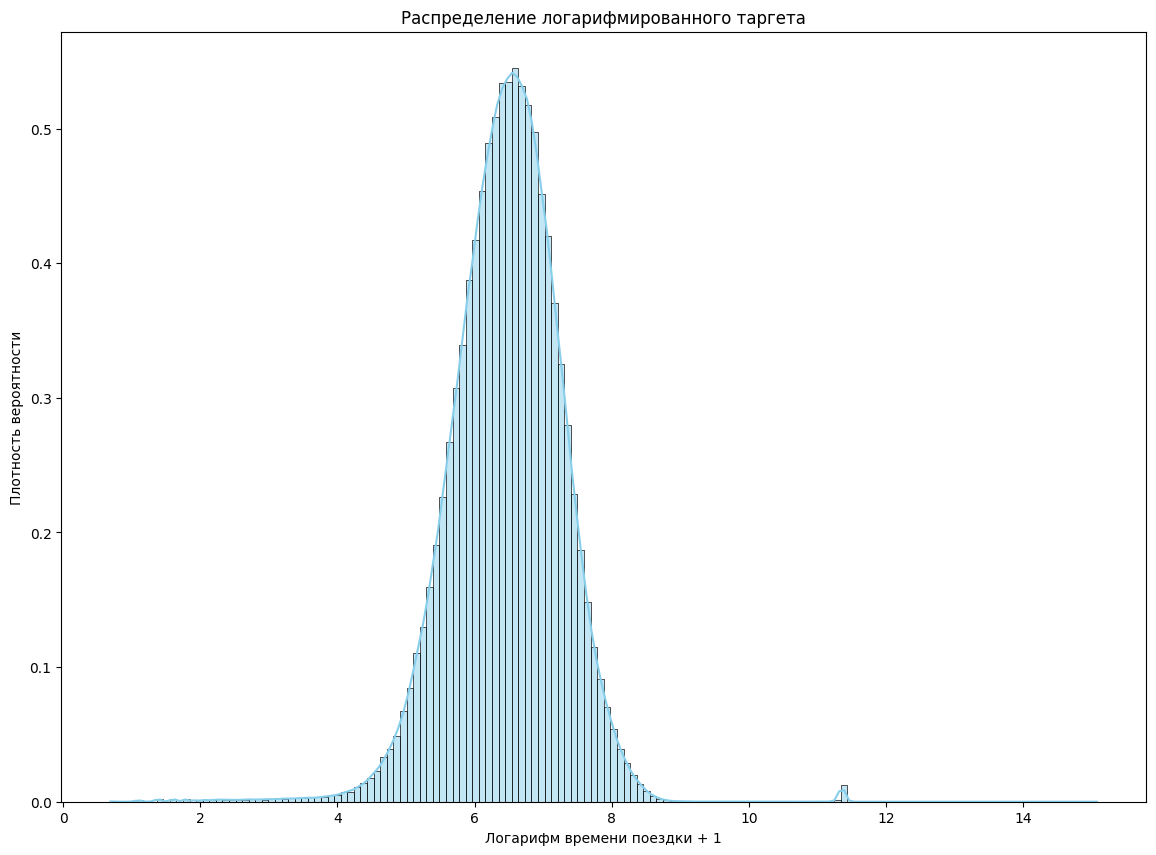

In [8]:
import numpy as np

data['log_trip_duration'] = np.log1p(data['trip_duration'])
data = data.drop('trip_duration', axis=1)

plt.figure(figsize=(14, 10))
sns.histplot(data['log_trip_duration'], bins=150, color='skyblue', stat='density', kde=True)
plt.title('Распределение логарифмированного таргета')
plt.xlabel('Логарифм времени поездки + 1')
plt.ylabel('Плотность вероятности')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [9]:
def rmsle(log1p_y_true, log1p_y_pred):
  return np.sqrt(np.mean((log1p_y_true - log1p_y_pred)**2))

log_trip_duration_median = np.mean(data['log_trip_duration'])
check = np.full(len(data['log_trip_duration']), log_trip_duration_median)
rmsle_best_const = rmsle(data['log_trip_duration'], check)

print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

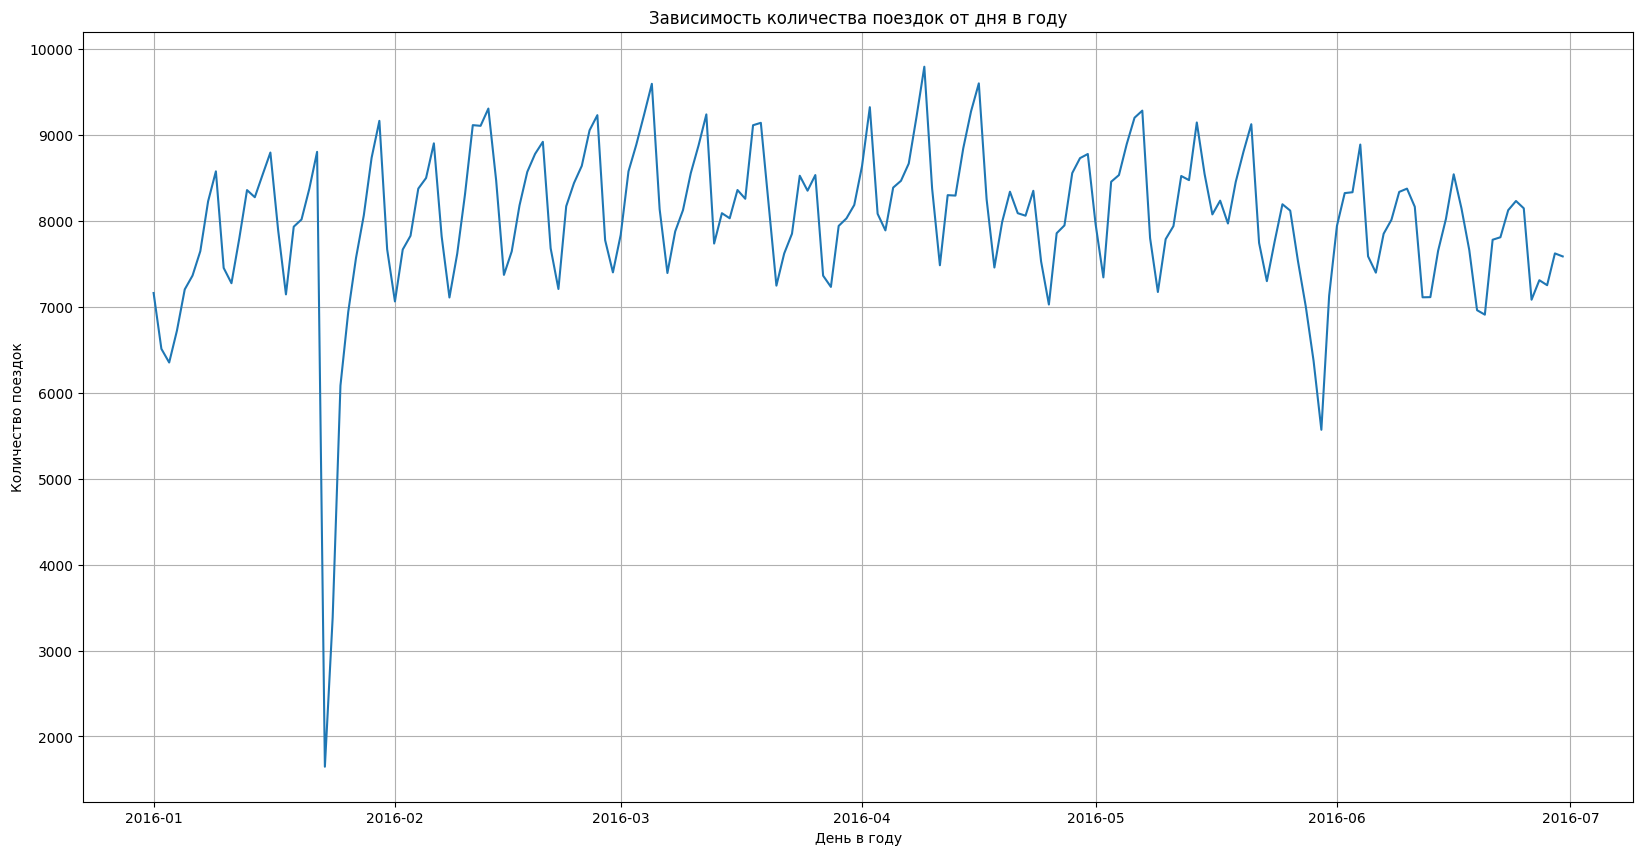

In [10]:
trips_per_day = data.groupby(data['pickup_datetime'].dt.date).size()

plt.figure(figsize=(20, 10))
plt.plot(trips_per_day.index, trips_per_day.values)
plt.xlabel('День в году')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от дня в году')
plt.grid(True)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [11]:
from scipy.signal import find_peaks

peaks_inds, _ = find_peaks(-trips_per_day)
two_smallest_peaks = trips_per_day.iloc[peaks_inds].sort_values().head(2)
two_smallest_peaks.index = pd.to_datetime(two_smallest_peaks.index)
anomaly_days = two_smallest_peaks.index.strftime('%Y-%m-%d').tolist()

print(f"Даты двух самых сильных скачков вниз: {anomaly_days}")

Даты двух самых сильных скачков вниз: ['2016-01-23', '2016-05-30']


*   2016-01-23 - снежная буря в Нью-Йорке, из-за которой власти запретили автомобильное движение
*   2016-05-30 - национальный День Памяти в Нью-Йорке

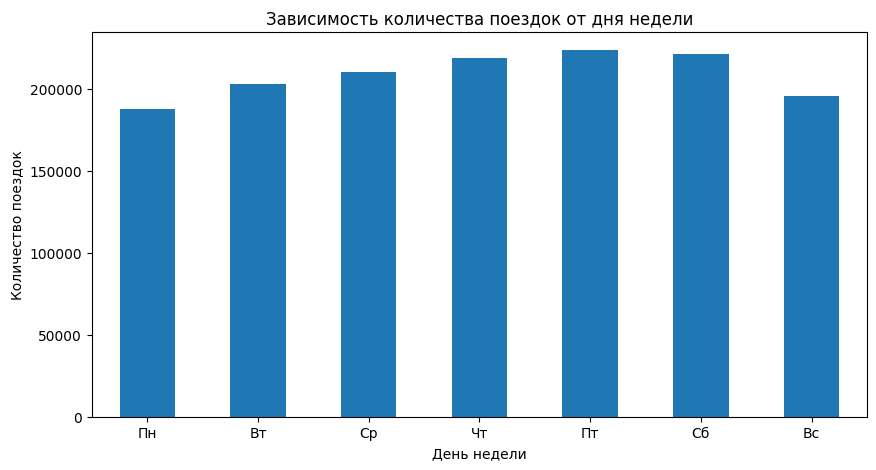

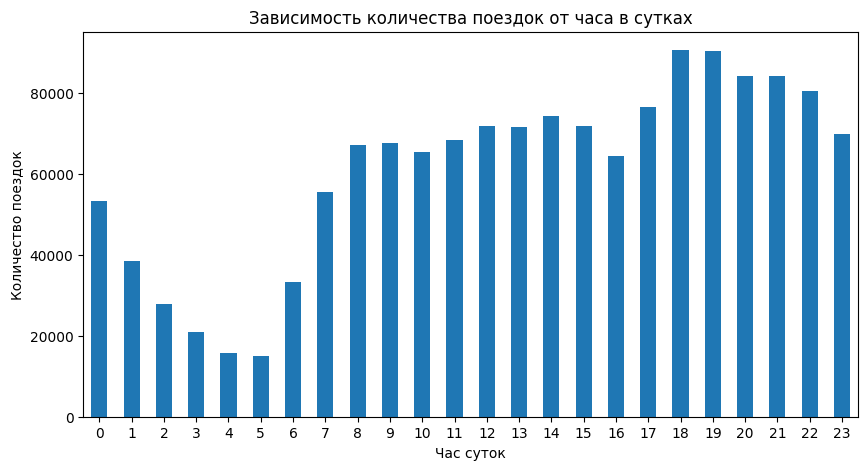

In [12]:
plt.figure(figsize=(10, 5))
data['pickup_datetime'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от дня недели')
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
plt.xticks(range(len(day_names)), day_names, rotation=0, ha='center')
plt.show()

print()

plt.figure(figsize=(10, 5))
data['pickup_datetime'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Час суток')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от часа в сутках')
plt.xticks(rotation=0, ha='center')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [13]:
print(f"Минимальная дата: {data['pickup_datetime'].min()}")
print(f"Максимальная дата: {data['pickup_datetime'].max()}")

Минимальная дата: 2016-01-01 00:00:17
Максимальная дата: 2016-06-30 23:59:39


Всего 6 месяцев

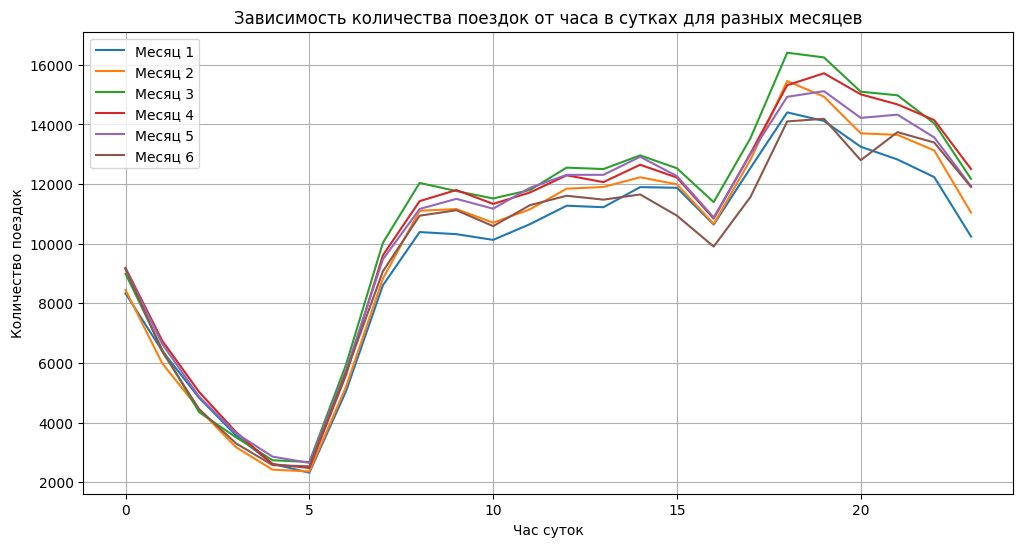

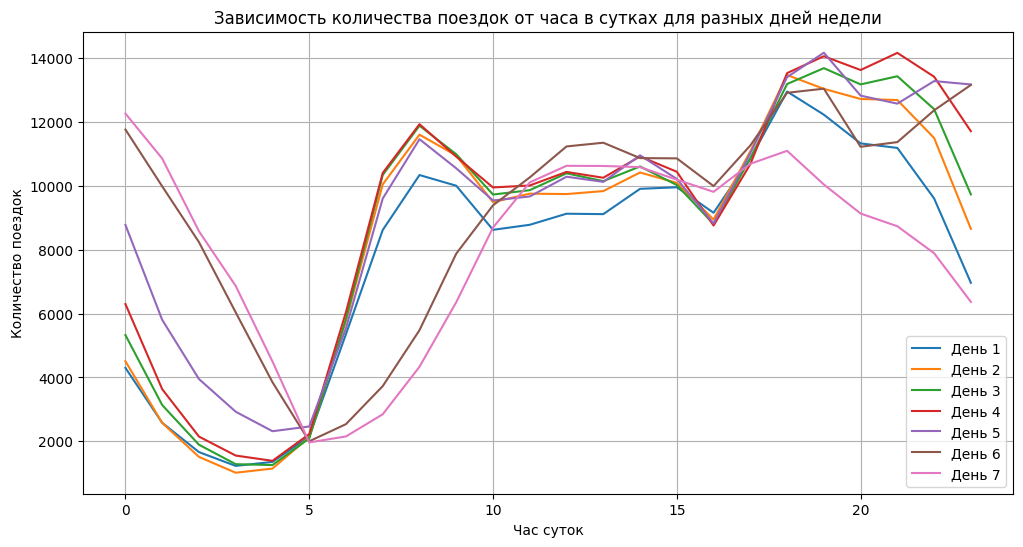

In [14]:
plt.figure(figsize=(12, 6))
for month in range(1, 7):
  month_pickup = data[data['pickup_datetime'].dt.month == month]
  pickups_in_hour = month_pickup['pickup_datetime'].dt.hour.value_counts().sort_index()
  plt.plot(pickups_in_hour.index, pickups_in_hour.values, label=f'Месяц {month}')

plt.xlabel('Час суток')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от часа в сутках для разных месяцев')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for day in range(7):
  dayofweek_pickup = data[data['pickup_datetime'].dt.dayofweek == day]
  pickups_in_hour = dayofweek_pickup['pickup_datetime'].dt.hour.value_counts().sort_index()
  plt.plot(pickups_in_hour.index, pickups_in_hour.values, label=f'День {day+1}')

plt.xlabel('Час суток')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от часа в сутках для разных дней недели')
plt.legend()
plt.grid(True)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?
Зависимость количества поездок от часа в сутках для разных месяцев: график выглядит более единым, чем зависимость в случае разных дней недели. Примерно с 21 вечера до 5 утра наблюдается спад количества поездок, что логично, так как город спит. Затем до 10 утра количество увеличивается, что соответствует тому, что население едет на работу. Также есть "локальный минимум" в 4-5 часов, так как это уже не обеденное время и многие работают. 7 вечера - пик количества, так как работники возвращаются домой, что создает большое количество пробок

Зависимость количества поездок от часа в сутках для разных дней недели: различия между днями недели прослеживаются лучше, чем между месяцами. Можно заметить, что в субботу и воскресенье количество поездок 12 ночи до 5 утра значительно превышается количество в то же время в течение недели, что соответствует реальности, так как это выходние, люди отдыхают допоздна и ночью или под утро возвращаются домой. Для этих же дней количество поездок до 12 утра меньше, чем в рабочие, так как все спят после ночи. Остальные дни показывают очень похожие значения




**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

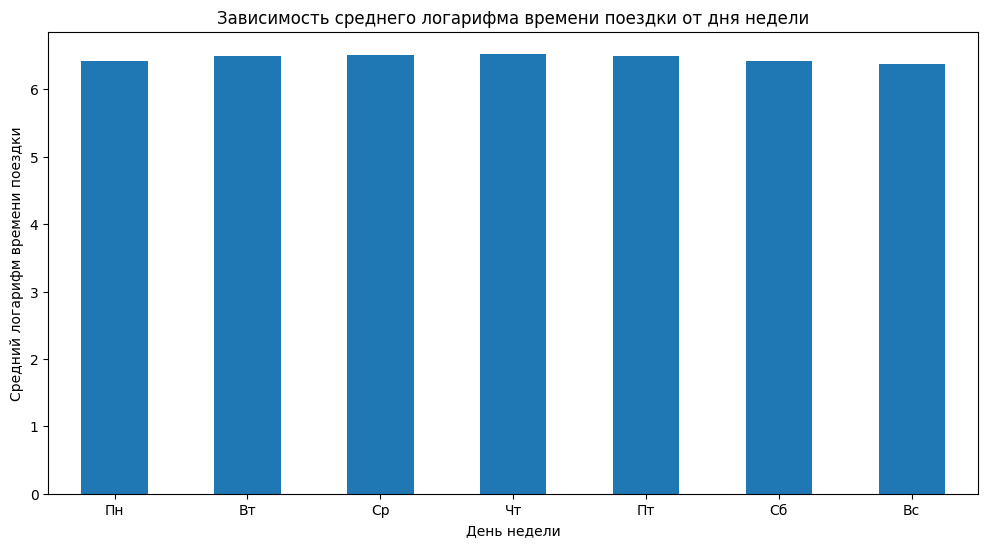

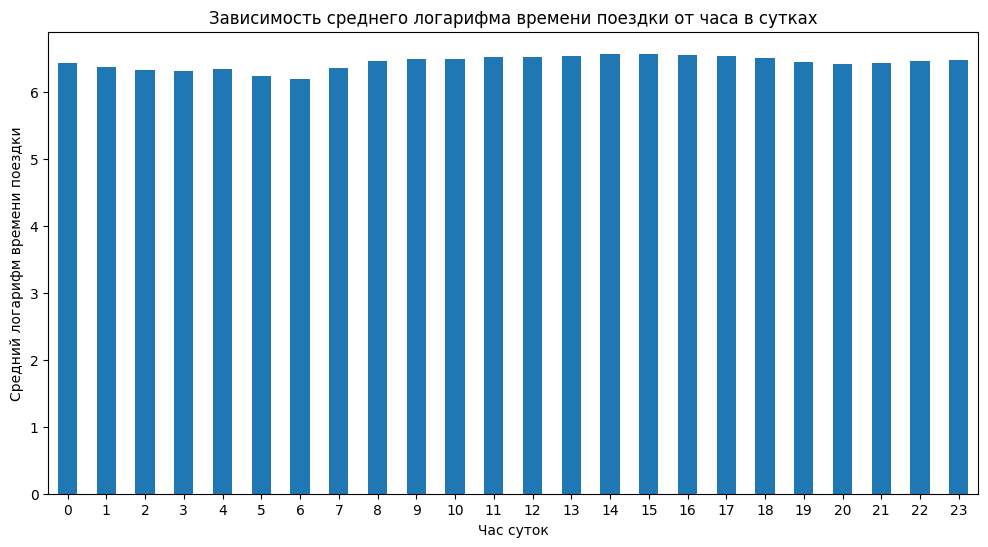

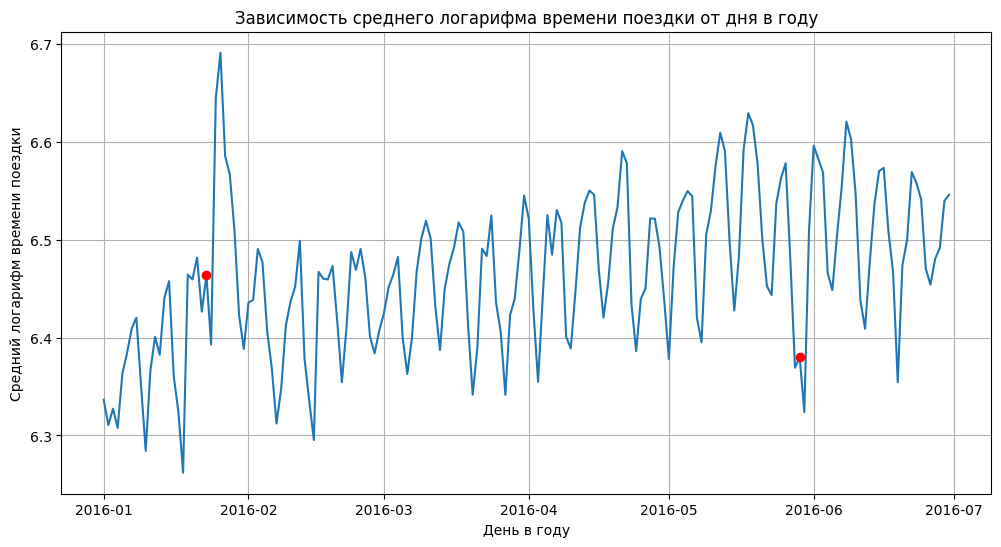

In [15]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

plt.figure(figsize=(12, 6))
train_data.groupby(train_data['pickup_datetime'].dt.dayofweek)['log_trip_duration'].mean().plot(kind='bar')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм времени поездки')
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
plt.xticks(range(len(day_names)), day_names, rotation=0, ha='center')
plt.xticks(rotation=0, ha='center')
plt.show()

plt.figure(figsize=(12, 6))
train_data.groupby(train_data['pickup_datetime'].dt.hour)['log_trip_duration'].mean().plot(kind='bar')
plt.xlabel('Час суток')
plt.ylabel('Средний логарифм времени поездки')
plt.title('Зависимость среднего логарифма времени поездки от часа в сутках')
plt.xticks(rotation=0, ha='center')
plt.show()

plt.figure(figsize=(12, 6))
mean_duration_by_day = train_data.groupby(train_data['pickup_datetime'].dt.date)['log_trip_duration'].mean()
plt.plot(mean_duration_by_day.index, mean_duration_by_day.values)
plt.xlabel('День в году')
plt.ylabel('Средний логарифм времени поездки')
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
plt.scatter(mean_duration_by_day.index[[22, 149]], mean_duration_by_day.values[[22, 149]], color='red', zorder=5) #23,150 дни - дни пика
plt.grid(True)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

*   График зависимости таргета от дня недели и аналогичный для количества поездок: графики похожи, в случае количества поездок для разных дней неделеи значения немного отличаются, но нет резких скачков, отличия небольшие. В разные дни недели люди используют такси для разных целей - в рабочие дня для поездки для работы, в выходные - для поездки до места отдыха, поэтому значения сильно не меняются
*   График зависимости таргета от часа в сутках и аналогичный для количества поездок: логарифм более сглаженный, чем обычный график. Это связано с тем, что в определенный час количество времени может отличаться (например, самое низкое значение в 5 утра), но сама продолжительность поездок не меняется
*   Таргет во время аномальных периодов: даты соответствую локальным максимумам. Это может значить, что среднее время в дороге увеличилось, хотя количество и было маленьким, например, в связи с погодными условиями, как было 23 января
*   Тренды на графике log_trip_duration: в зимнее время средняя продолжительность ниже, чем в летнее время







Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [16]:
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['month'] = data['pickup_datetime'].dt.month
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_year'] = data['pickup_datetime'].dt.dayofyear

anomaly_date_1 = pd.to_datetime(anomaly_days[0]).date()
anomaly_date_2 = pd.to_datetime(anomaly_days[1]).date()

data['anomaly_1'] = (data['pickup_datetime'].dt.date == anomaly_date_1).astype(int)
data['anomaly_2'] = (data['pickup_datetime'].dt.date == anomaly_date_2).astype(int)

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month,hour,day_of_year,anomaly_1,anomaly_2
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0,3,17,74,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0,164,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11,19,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2,4,19,97,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,5,3,13,86,0,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?


*   День недели - категориальный (нет упорядочивания, просто номер)
*   Месяц - категориальный (нельзя сложить друг с другом)
*   Час - категориальный (расмматриваем час пики в зависимости от часов или продолжительность поездок - это категория)
*   День в году - численный (можно упорядочить, первый день в году раньше 1)
*   Принадлежность анамальному периоду - категориальный (принадлежит или нет)





**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [17]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['day_of_year']
categorical_features = ['day_of_week', 'month', 'hour', 'anomaly_1', 'anomaly_2']

preprocessor = ColumnTransformer([('num', StandardScaler(), numeric_features), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmsle_score = rmsle(y_test, y_pred)
print(f'RMSLE: {rmsle_score:.4f}')

RMSLE: 0.7882


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [18]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [19]:
sample_data = data.sample(1000)
your_lat_values = sample_data['pickup_latitude'].values
your_lon_values = sample_data['pickup_longitude'].values

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?


Видно скопление точек рядом с аэропортом John F. Kennedy. Поездки отсюда будут длиньше и дольше, чем поездки в городе. То же самое касается и Edo Seaplane Base. Также выделяется центральный парк, внутри него нет точек, это значит, что продолжительность поездок в городе увеличивается из-за него, так как приходится объезжать

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [20]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # в км
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

data['haversine'] = haversine_array(
    data['pickup_latitude'].values,
    data['pickup_longitude'].values,
    data['dropoff_latitude'].values,
    data['dropoff_longitude'].values)

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month,hour,day_of_year,anomaly_1,anomaly_2,haversine
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0,3,17,74,0,0,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0,164,0,0,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11,19,0,0,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2,4,19,97,0,0,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,5,3,13,86,0,0,1.188588


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [21]:
data['log_haversine'] = np.log1p(data['haversine'])
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month,hour,day_of_year,anomaly_1,anomaly_2,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0,3,17,74,0,0,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0,164,0,0,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11,19,0,0,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2,4,19,97,0,0,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,5,3,13,86,0,0,1.188588,0.783257


Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [22]:
corr_haversine = data['haversine'].corr(data['log_trip_duration'])
corr_log_haversine = data['log_haversine'].corr(data['log_trip_duration'])

print(f"Корреляция haversine: {corr_haversine:.4f}")
print(f"Корреляция log_haversine: {corr_log_haversine:.4f}")

Корреляция haversine: 0.5736
Корреляция log_haversine: 0.7499


Корреляция log_haversine c log_trip_duration выше, чем корреляция haversine c log_trip_duration, значит, логарифм расстояния лучше отражает таргет

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

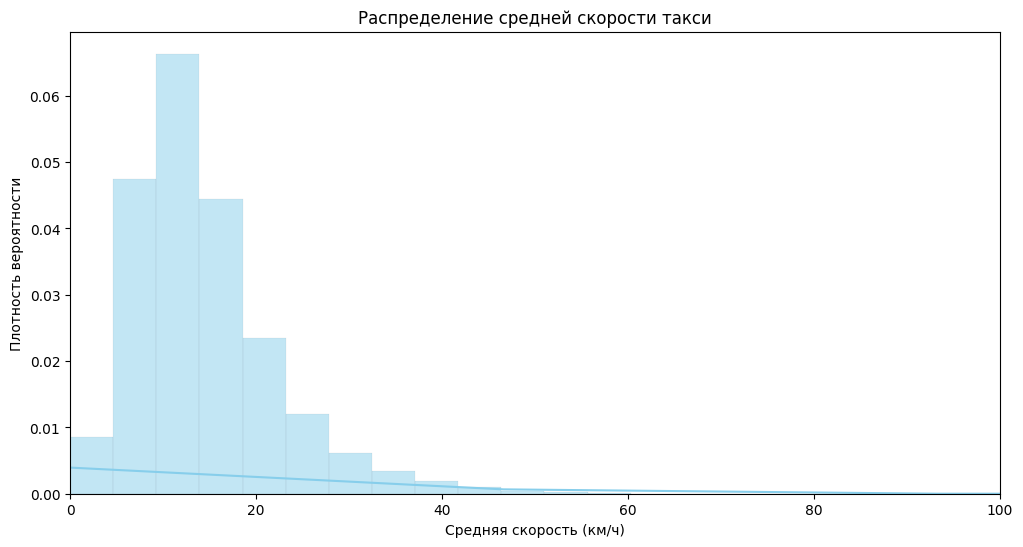

In [23]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
train_data['average_speed'] = train_data['haversine'] / (train_data['log_trip_duration'].apply(np.exp) - 1) * 3600 # км в час

plt.figure(figsize=(12, 6))
sns.histplot(train_data['average_speed'], bins=2000, color='skyblue', stat='density', kde=True)
plt.title('Распределение средней скорости такси')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Плотность вероятности')
plt.xlim(0, 100)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

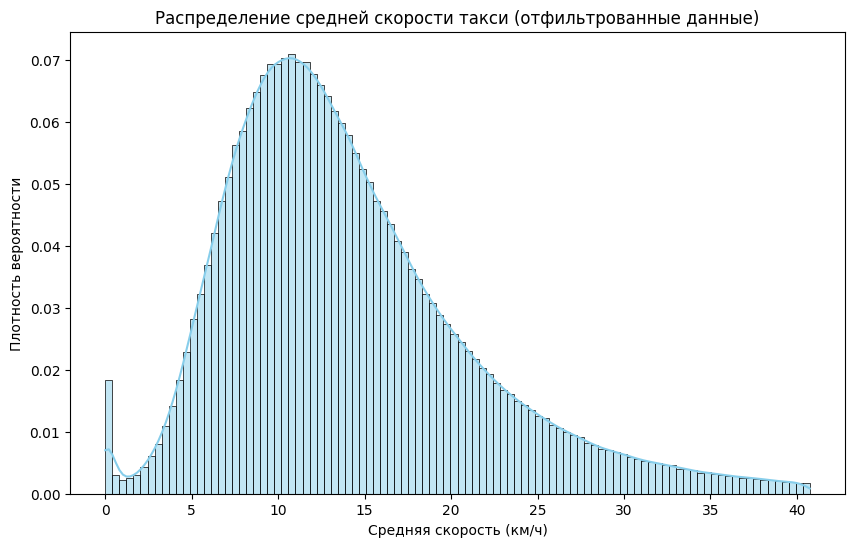

In [24]:
threshold = train_data['average_speed'].quantile(0.99)  # отсекаем 1% самых быстрых поездок
filtered_train_data = train_data[train_data['average_speed'] < threshold]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_train_data['average_speed'], bins=100, color='skyblue', stat='density', kde=True)
plt.title('Распределение средней скорости такси (отфильтрованные данные)')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Плотность вероятности')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

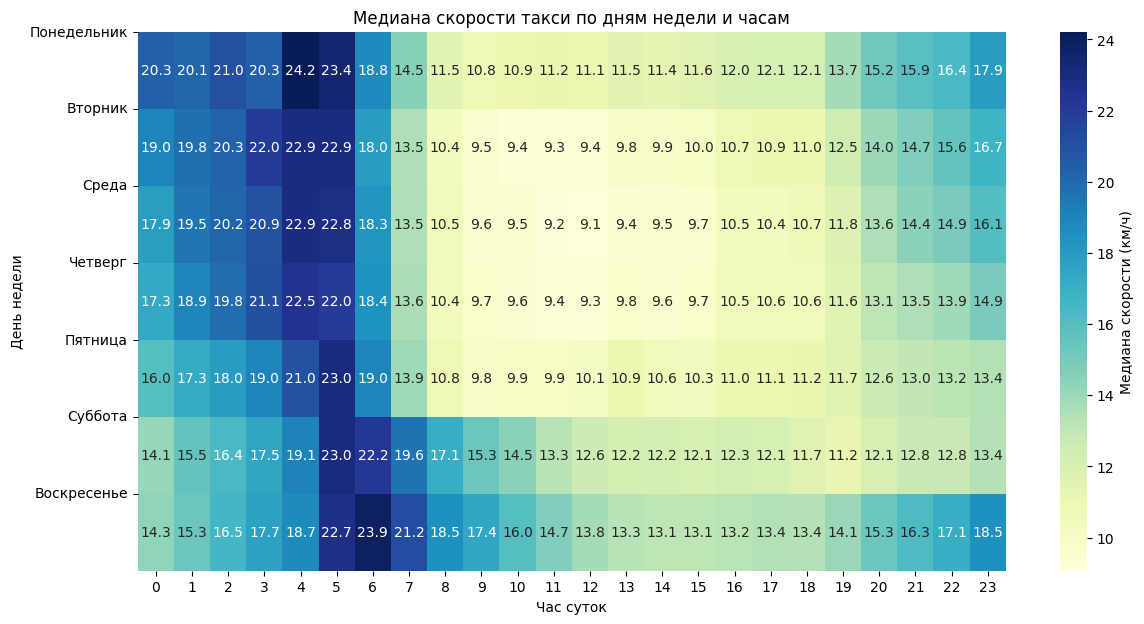

In [25]:
speed_median = train_data.groupby([train_data['pickup_datetime'].dt.dayofweek, train_data['pickup_datetime'].dt.hour])['average_speed'].median().unstack()

plt.figure(figsize=(14, 7))
sns.heatmap(speed_median, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Медиана скорости (км/ч)'})
plt.title('Медиана скорости такси по дням недели и часам')
plt.xlabel('Час суток')
plt.ylabel('День недели')

days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
plt.yticks(ticks=np.arange(7), labels=days, rotation=0)
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Скорость расчитывается с помощью времени поездки, а мы пытаемся его предсказать. Если оставить скорость, то модель просто запомнит зависимость, а не научится предсказвать

In [26]:
train_data = train_data.drop('average_speed', axis=1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Скорость минимальна со вторника по четверг в 12 утра и максимальна в 5 утра во все дни недели

In [27]:
train_data['traffic_jams'] = ((train_data['pickup_datetime'].dt.hour >= 8) & (train_data['pickup_datetime'].dt.hour <= 19))
train_data['free_roads'] = np.where(train_data['traffic_jams'], False, True)

test_data['traffic_jams'] = ((test_data['pickup_datetime'].dt.hour >= 8) & (test_data['pickup_datetime'].dt.hour <= 19))
test_data['free_roads'] = np.where(test_data['traffic_jams'], False, True)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Эти признаки могут быть полезны, потому что если поездка начинается или заканчивается в одном из этих пунктов, то она скорее всего будет иметь большую продолжительность и по времени, и по расстоянию

In [28]:
jfk_lat, jfk_lon = 40.6413, -73.79035 # координаты аэропорта John F. Kennedy
esb_lat, esb_lon = 40.7740, -73.871 # координаты Edo Seaplane Base
central_park_lat, central_park_lon = 40.7811, -73.968 # координаты Центрального парка

def is_near(lat1, lon1, lat2, lon2):
  distance = haversine_array(lat1, lon1, lat2, lon2)
  return distance <= 2 # не более 2 км

data['pickup_jfk'] = is_near(data['pickup_latitude'], data['pickup_longitude'], jfk_lat, jfk_lon)
data['dropoff_jfk'] = is_near(data['dropoff_latitude'], data['dropoff_longitude'], jfk_lat, jfk_lon)

data['pickup_sea'] = is_near(data['pickup_latitude'], data['pickup_longitude'], esb_lat, esb_lon)
data['dropoff_sea'] = is_near(data['dropoff_latitude'], data['dropoff_longitude'], esb_lat, esb_lon)

data['pickup_central_park'] = is_near(data['pickup_latitude'], data['pickup_longitude'], central_park_lat, central_park_lon)
data['dropoff_central_park'] = is_near(data['dropoff_latitude'], data['dropoff_longitude'], central_park_lat, central_park_lon)

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,anomaly_1,anomaly_2,haversine,log_haversine,pickup_jfk,dropoff_jfk,pickup_sea,dropoff_sea,pickup_central_park,dropoff_central_park
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,1.498521,0.915699,False,False,False,False,True,True
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,1.805507,1.031584,False,False,False,False,False,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,0,6.385098,1.999464,False,False,False,False,False,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,0,1.485498,0.910473,False,False,False,False,False,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,0,1.188588,0.783257,False,False,False,False,True,True


Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

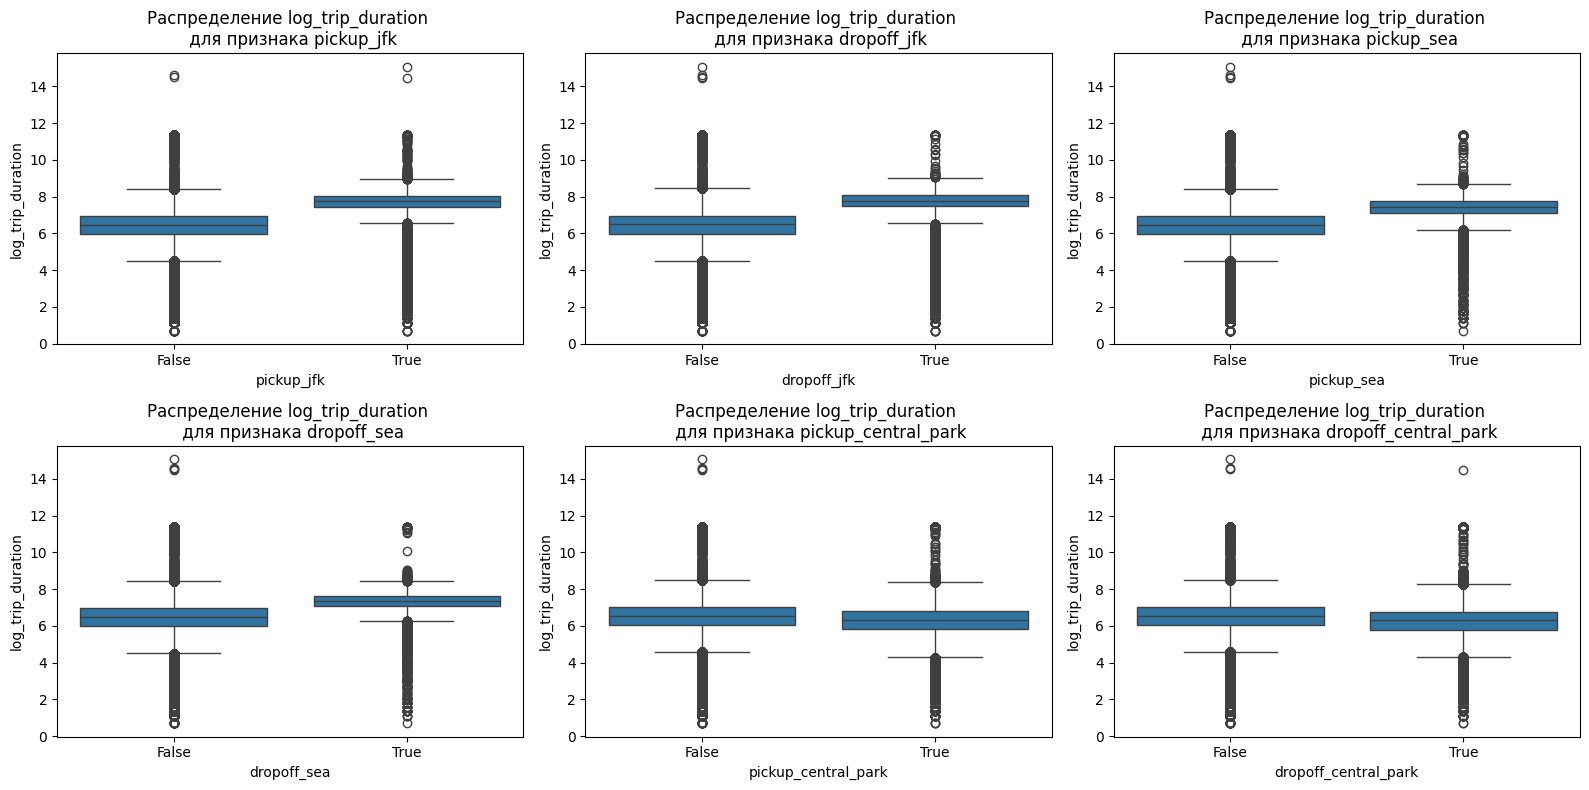

In [29]:
features = ['pickup_jfk', 'dropoff_jfk', 'pickup_sea', 'dropoff_sea', 'pickup_central_park', 'dropoff_central_park']

plt.figure(figsize=(16, 8))
for i in range(len(features)):
  feature = features[i]
  plt.subplot(2, 3, i+1)
  sns.boxplot(x=feature, y='log_trip_duration', data=data)
  plt.title(f'Распределение log_trip_duration \n для признака {feature}')

plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Признаки получились неплохими. Поездки в/из аэропорта John F. Kennedy в среднем занимают больше времени, чем поездки из других мест, так как он дальше. Поездки, начинающиеся рядом с Центральным парком имеют  больший разброс длительности, так как из центра продолжительность поездок может сильно отличаться

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, n_rows=10, n_cols=10, lon_min=-74, lon_max=-73, lat_min=40, lat_max=41):
    self.n_rows = n_rows
    self.n_cols = n_cols
    self.lon_min = lon_min
    self.lon_max = lon_max
    self.lat_min = lat_min
    self.lat_max = lat_max
    self.mean_values = {}

  def show_map(self):
    m = folium.Map(location=[(self.lat_max + self.lat_min)/2, (self.lon_max + self.lon_min)/2], zoom_start=12)
    for i in range(self.n_rows):
      for j in range(self.n_cols):
        lat_lower_border = self.lat_min + i * (self.lat_max - self.lat_min) / self.n_rows
        lon_left_border = self.lon_min + j * (self.lon_max - self.lon_min) / self.n_cols
        lat_upper_border = self.lat_min + (i+1) * (self.lat_max - self.lat_min) / self.n_rows
        lon_right_border = self.lon_min + (j+1) * (self.lon_max - self.lon_min) / self.n_cols
        folium.Rectangle(bounds=[(lat_lower_border, lon_left_border), (lat_upper_border, lon_right_border)], color='blue', fill=False, weight=1).add_to(m)
    return m

  def fit(self, X=None, y=None):
    for col in ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']:
      self.mean_values[col] = X[col].mean()
    return self

  def transform(self, X, y=None):
    X = X.copy()
    for col in ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']:
      if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())

    X['pickup_cell'] = -1
    pickup_in_grid = (X['pickup_longitude'] >= self.lon_min) & (X['pickup_longitude'] <= self.lon_max) & (X['pickup_latitude'] >= self.lat_min) & (X['pickup_latitude'] <= self.lat_max)
    X_pickup = X.loc[pickup_in_grid]

    normalized_lat = (X_pickup['pickup_latitude'] - self.lat_min) / (self.lat_max - self.lat_min)
    normalized_lon = (X_pickup['pickup_longitude'] - self.lon_min) / (self.lon_max - self.lon_min)
    row_index = (normalized_lat * self.n_rows).astype(int)
    col_index = (normalized_lon * self.n_cols).astype(int)

    X.loc[pickup_in_grid, 'pickup_cell'] = row_index * self.n_cols + col_index

    X['dropoff_cell'] = -1
    dropoff_in_grid = (X['dropoff_longitude'] >= self.lon_min) & (X['dropoff_longitude'] <= self.lon_max) & (X['dropoff_latitude'] >= self.lat_min) & (X['dropoff_latitude'] <= self.lat_max)
    X_dropoff = X.loc[dropoff_in_grid]

    normalized_lat = (X_dropoff['dropoff_latitude'] - self.lat_min) / (self.lat_max - self.lat_min)
    normalized_lon = (X_dropoff['dropoff_longitude'] - self.lon_min) / (self.lon_max - self.lon_min)
    row_index = (normalized_lat * self.n_rows).astype(int)
    col_index = (normalized_lon * self.n_cols).astype(int)

    X.loc[dropoff_in_grid, 'dropoff_cell'] = row_index * self.n_cols + col_index

    return X[['pickup_cell', 'dropoff_cell']]

In [31]:
grid_transformer = MapGridTransformer(n_rows=10, n_cols=20, lon_min=-74.05, lon_max=-73.9, lat_min=40.7, lat_max=40.85)
data_transformed = grid_transformer.fit_transform(data)
grid_transformer.show_map()

In [32]:
data_transformed.head()

,pickup_cell,dropoff_cell
0,89,91
1,49,46
2,89,5
3,25,5
4,130,110


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [33]:
data = pd.concat([data, data_transformed], axis=1)

X = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['day_of_year', 'log_haversine']
categorical_features = ['day_of_week', 'month', 'hour', 'anomaly_1', 'anomaly_2', 'pickup_jfk', 'dropoff_jfk', 'pickup_sea', 'dropoff_sea',
                       'pickup_central_park', 'dropoff_central_park']
geo_features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
geo_transformer = MapGridTransformer(n_rows=10, n_cols=20, lon_min=-74.05, lon_max=-73.9, lat_min=40.7, lat_max=40.85)

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features),
                                ('geo', geo_transformer, geo_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Ridge())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmsle_score = rmsle(y_test, y_pred)

print(f'RMSLE: {rmsle_score:.4f}')

RMSLE: 0.4876


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [34]:
for feature in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']:
  print(f'Уникальных значений для признака {feature}: {data[feature].nunique()}')

Уникальных значений для признака vendor_id: 2
Уникальных значений для признака passenger_count: 10
Уникальных значений для признака store_and_fwd_flag: 2


*   vendor_id: разные перевозчики могут использовать различные алгоритмы ценообразования, построения маршрута, водителей, что влияет на длительность поездки
*   passenger_count: чем больше пассажиров, тем больше может быть точек остановки во время маршрута, что увеличивает его продолжительность  
*   store_and_fwd_flag: если значение = N, то это говорит о проблемах поделючения к сервреу в момент поездки, что впоследствии могло повлиять на маршрут и время пути

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

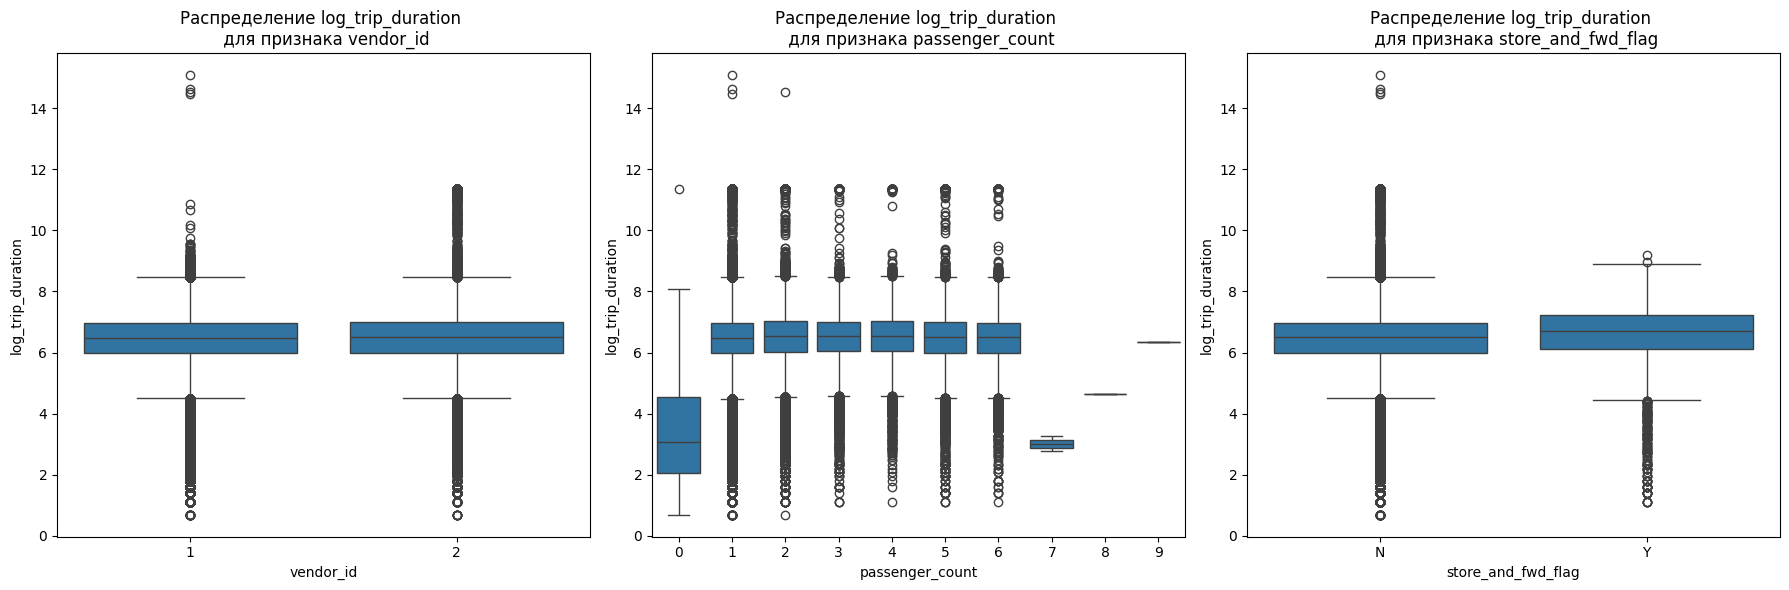

In [35]:
features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

plt.figure(figsize=(18, 6))

for i in range(len(features)):
  feature = features[i]
  plt.subplot(1, 3, i+1)
  sns.boxplot(x=feature, y='log_trip_duration', data=data)
  plt.title(f'Распределение log_trip_duration \n для признака {feature}')

plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [36]:
data['vendor_id'] = data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,haversine,log_haversine,pickup_jfk,dropoff_jfk,pickup_sea,dropoff_sea,pickup_central_park,dropoff_central_park,pickup_cell,dropoff_cell
0,id2875421,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,1.498521,0.915699,False,False,False,False,True,True,89,91
1,id2377394,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,1.805507,1.031584,False,False,False,False,False,False,49,46
2,id3858529,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,6.385098,1.999464,False,False,False,False,False,False,89,5
3,id3504673,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,1.485498,0.910473,False,False,False,False,False,False,25,5
4,id2181028,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,1.188588,0.783257,False,False,False,False,True,True,130,110


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?


*   vendor_id: признак будет не очень сильным. Медианные значения log_trip_duration для двух альтернатив очень близки, как и разброс данных
*   store_and_fwd_flag: признак будет немного лучше, чем vendor_id, но все еще не очень сильным. Различие в медианных значениях log_trip_duration для двух альтернатив немного больше, чем в первом варианте, но все равно близки, разброс данных практически одинакоый
*   passenger_count: тоже несильный признак, медиана для 1-6 пассажиров практически одинаковая, что говорит о том, что как правило все пассажиры едут в один пункт назначения, а не за 1 поездку в несколько различных точек




**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [37]:
X = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['day_of_year', 'log_haversine', 'passenger_count']
categorical_features = ['day_of_week', 'month', 'hour', 'anomaly_1', 'anomaly_2', 'pickup_jfk', 'dropoff_jfk', 'pickup_sea', 'dropoff_sea',
                       'pickup_central_park', 'dropoff_central_park', 'vendor_id', 'store_and_fwd_flag']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
geo_transformer = MapGridTransformer(n_rows=10, n_cols=20, lon_min=-74.05, lon_max=-73.9, lat_min=40.7, lat_max=40.85)
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features),
                                              ('geo', geo_transformer, geo_features)])
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Ridge())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmsle_score = rmsle(y_test, y_pred)

print(f'RMSLE: {rmsle_score:.4f}')

RMSLE: 0.4874


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Ошибка почти не изменилась, поэтому "ящики с усами" верно показали незначимость этих признаков

In [38]:
X = data.drop('vendor_id', axis=1)
X = data.drop('store_and_fwd_flag', axis=1)
X = data.drop('passenger_count', axis=1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

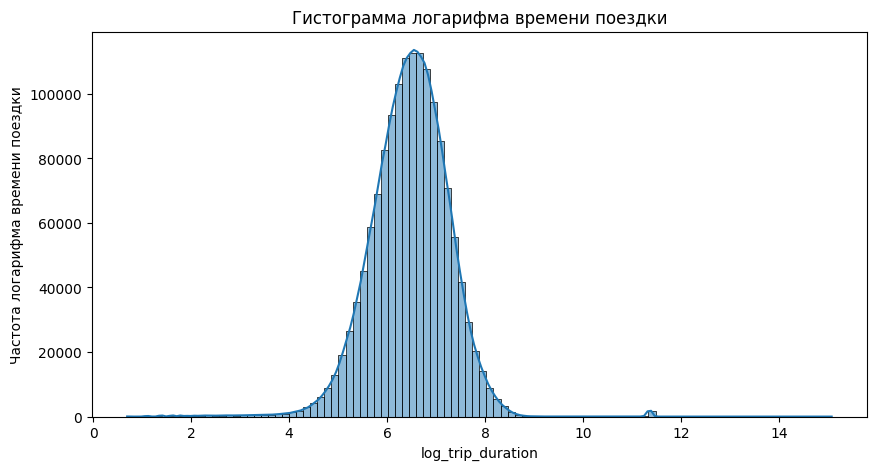

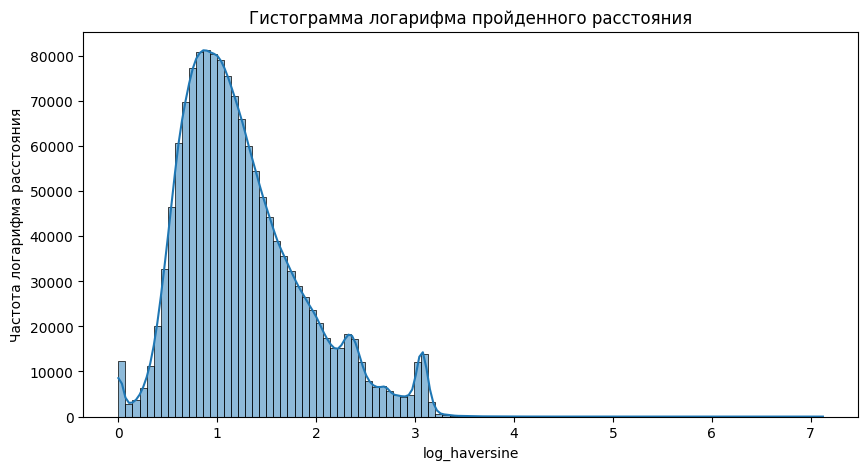

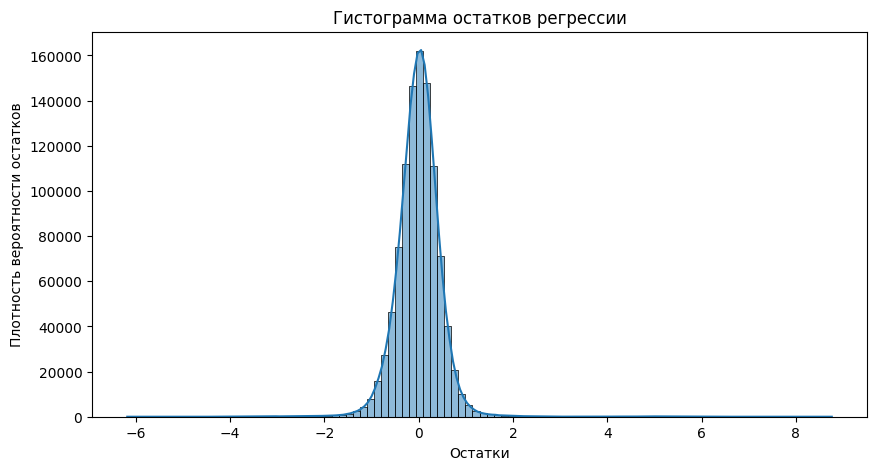

RMSLE на очищенных данных: 0.4043


In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(data['log_trip_duration'], bins=100, kde=True)
plt.title('Гистограмма логарифма времени поездки')
plt.xlabel('log_trip_duration')
plt.ylabel('Частота логарифма времени поездки')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['log_haversine'], bins=100, kde=True)
plt.title('Гистограмма логарифма пройденного расстояния')
plt.xlabel('log_haversine')
plt.ylabel('Частота логарифма расстояния')
plt.show()

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=100, kde=True)
plt.title('Гистограмма остатков регрессии')
plt.xlabel('Остатки')
plt.ylabel('Плотность вероятности остатков')
plt.show()

trip_duration_threshold = np.percentile(data['log_trip_duration'], 99.9) #99.9% значений в столбце меньше или равны trip_duration_threshold
distance_threshold = np.percentile(data['log_haversine'], 99.9) #99.9% значений в столбце меньше или равны distance_threshold
residuals_threshold = np.percentile(residuals, [0.5, 99.5]) # отсекаем по 0.5% самых маленьких и самых больших остатков

filtered_data = data[(data['log_trip_duration'] <= trip_duration_threshold) & (data['log_haversine'] <= distance_threshold) &
                    (residuals >= residuals_threshold[0]) & (residuals <= residuals_threshold[1])]
X_filtered = filtered_data.drop('log_trip_duration', axis=1)
y_filtered = filtered_data['log_trip_duration']
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)
model.fit(X_train_filtered, y_train_filtered)
y_pred_filtered = model.predict(X_test_filtered)
rmsle_filtered = rmsle(y_test_filtered, y_pred_filtered)

print(f'RMSLE на очищенных данных: {rmsle_filtered:.4f}')

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [40]:
def check_rare_categories(data, categorical_features):

  data = data.copy()

  for feature in categorical_features:
    category_counts = data[feature].value_counts(normalize=True) #частота каждой категории
    rare_categories = category_counts[category_counts < 0.05].index #названия категорий в признаках, чья частота меньше 5%
    data[feature] = data[feature].apply(lambda x: 'rare' if x in rare_categories else str(x))
  return data

X_train_filtered = check_rare_categories(X_train_filtered, categorical_features)
X_test_filtered = check_rare_categories(X_test_filtered, categorical_features)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [41]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features),
                                              ('geo', geo_transformer, geo_features)])
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Ridge())])
model.fit(X_train_filtered, y_train_filtered)
y_pred_filtered = model.predict(X_test_filtered)
rmsle_filtered = rmsle(y_test_filtered, y_pred_filtered)
print(f'RMSLE на очищенных данных: {rmsle_filtered:.4f}')

RMSLE на очищенных данных: 0.4285


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [42]:
num_features_before = len(numeric_features) + len(categorical_features) # до OneHot-кодирования

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features),
                                              ('geo', geo_transformer, geo_features)])
preprocessor.fit(X_train_filtered)
num_features_after = preprocessor.transform(X_train_filtered).shape[1] # после OneHot-кодирования

print(f'Количество признаков до кодирования: {num_features_before}')
print(f'Количество признаков после кодирования: {num_features_after}')

Количество признаков до кодирования: 16
Количество признаков после кодирования: 46


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [43]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Lasso())])
model = lasso_pipeline.fit(X_train_filtered, y_train_filtered)
y_pred_lasso = model.predict(X_test_filtered)

rmsle_lasso = rmsle(y_test_filtered, y_pred_lasso)

print(f'RMSLE (Ridge): {rmsle_filtered:.4f}')
print(f'RMSLE (Lasso): {rmsle_lasso:.4f}')

RMSLE (Ridge): 0.4285
RMSLE (Lasso): 0.7099


Ridge регрессия лучше

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [44]:
from sklearn.model_selection import GridSearchCV

X_train_filtered, X_val_filtered, y_train_filtered, y_val_filtered = train_test_split(X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)

numeric_cols = X_train_filtered.select_dtypes(include=np.number).columns
X_train_filtered = X_train_filtered[numeric_cols]
X_test_filtered = X_test_filtered[numeric_cols]

alphas = np.logspace(-2, 3, 20)

ridge_searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5, verbose=1)
ridge_searcher.fit(X_train_filtered, y_train_filtered)
best_alpha_ridge = ridge_searcher.best_params_["alpha"]
print("Лучший alpha (Ridge) = %.4f" % best_alpha_ridge)

lasso_searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5, verbose=1)
lasso_searcher.fit(X_train_filtered, y_train_filtered)
best_alpha_lasso = lasso_searcher.best_params_["alpha"]
print("Лучший alpha (Lasso) = %.4f" % best_alpha_lasso)

best_ridge = Ridge(alpha=best_alpha_ridge)
best_lasso = Lasso(alpha=best_alpha_lasso)

best_ridge.fit(X_train_filtered, y_train_filtered)
best_lasso.fit(X_train_filtered, y_train_filtered)

y_pred_ridge = best_ridge.predict(X_test_filtered)
y_pred_lasso = best_lasso.predict(X_test_filtered)

rmsle_ridge_test = rmsle(y_test_filtered, y_pred_ridge)
rmsle_lasso_test = rmsle(y_test_filtered, y_pred_lasso)

print("RMSLE (Ridge) на тестовой выборке:", rmsle_ridge_test)
print("RMSLE (Lasso) на тестовой выборке:", rmsle_lasso_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучший alpha (Ridge) = 48.3293
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучший alpha (Lasso) = 0.0100
RMSLE (Ridge) на тестовой выборке: 0.4326307575153377
RMSLE (Lasso) на тестовой выборке: 0.4373073015654944


Сохраните наилучшее значение, как бенчмарк на будущее

In [45]:
best_rmsle = rmsle_ridge_test
print(f'Бенчмарк: {best_rmsle:.4f}')

Бенчмарк: 0.4326


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

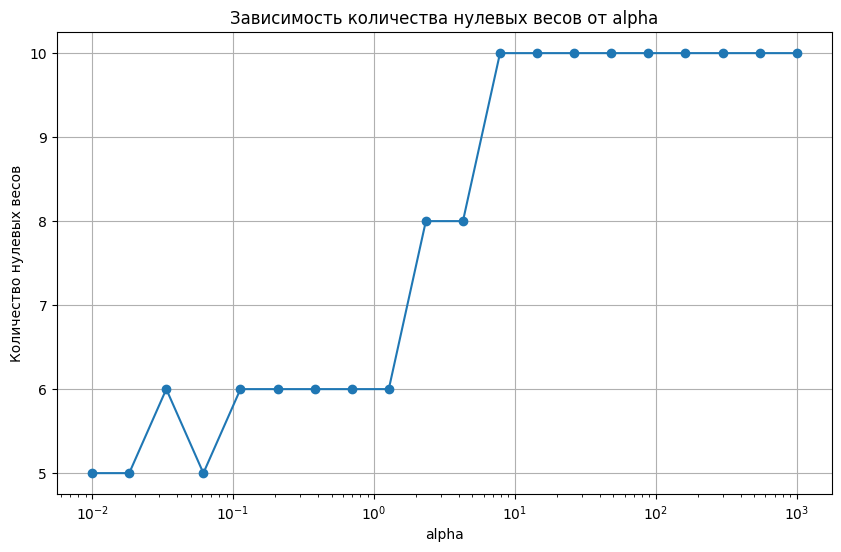

RMSLE при сокращении признаков вдвое: 0.4373


In [46]:
zero_coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    model = lasso.fit(X_train_filtered, y_train_filtered)
    zero_coefs.append(np.sum(model.coef_ == 0))

plt.figure(figsize=(10, 6))
plt.plot(alphas, zero_coefs, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Количество нулевых весов')
plt.title('Зависимость количества нулевых весов от alpha')
plt.grid(True)
plt.show()

threshold = len(X_train_filtered.columns) // 2  # половина от исходного количества признаков
zero_coefs = np.array(zero_coefs)
far_from_threshold = np.abs(zero_coefs - threshold)
best_alpha_lasso_half_features = alphas[np.argmin(far_from_threshold)] # при таком alpha количество нулевых коэффициентов наиболее близко к порогу
lasso_half_features = Lasso(alpha=best_alpha_lasso_half_features)
model = lasso_half_features.fit(X_train_filtered, y_train_filtered)
y_pred_lasso_half_features = model.predict(X_test_filtered)
rmsle_half_features = rmsle(y_test_filtered, y_pred_lasso_half_features)
print(f"RMSLE при сокращении признаков вдвое: {rmsle_half_features:.4f}")

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
pair_counts = data.groupby(['pickup_cell', 'dropoff_cell']).size().reset_index(name='count') #количество случаев каждой пары ячеек посадки-высадки
top_pairs = pair_counts.nlargest(100, 'count')[['pickup_cell', 'dropoff_cell']]
top_pairs['pair_id'] = top_pairs.index
data = data.merge(top_pairs, on=['pickup_cell', 'dropoff_cell'], how='left')
data['pair_id'] = data['pair_id'].fillna(-1).astype(int)
print(data.head())

Таким образом можно создавать шаблоны уникальных поездок, которые линейная модель не распознает, так как линейные модели предполагают независимость функций и требуют конкретных условий взаимодействия для построения модели для комбинированных переменных